<a href="https://colab.research.google.com/github/canunz/machinelearning/blob/main/machine_learning_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-HR-Employee-Attrition (1).csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


# Introducción:
En este notebook se realizará un análisis exploratorio de datos (EDA) sobre el conjunto de datos de Employee Attrition. El objetivo es identificar patrones y factores que influyen en la rotación de empleados. Comenzaremos con la identificación de variables categóricas y numéricas, seguido de un análisis descriptivo y visualizaciones para entender las relaciones entre las diferentes características y la rotación *de* personal.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualizaciones
sns.set_style("whitegrid")  # Versión corregida
sns.set(font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 8)

# Cargar el dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition (1).csv')

# Examinar las primeras filas
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


En este bloque se importan las bibliotecas necesarias para la manipulación y visualización de datos. Se configura el estilo de las graficas y el tamaño de las figuras para asegurar una presentacion clara de los resultados. Luego, se carga el dataset de rotacion de empleados utilizando "pandas", y se examinan las primeras filas para obtener una visión general de las variables presenten en el conjunto de datos:

*   Pandas: Manipular y analizar datos.
*   numpy: realizar operaciones matematicas y estadisticas.
*   matplotlib y seaborn: crear visualizaciones gráficas.
*   df.head(): muestra las primeras 5 filas del dataset para un primer vistazo.

Más que nada, la tabla muestra informacion de los empleados y su rotacion en la empresa, caracteristicas, niveles de satisfaccion y desempeño y su historial en la empresa.





# Información general del database
Este bloque permite obtener una vision general de la estructura del dataset. Es util como primer paso en cualquier analisis exploratorio de datos.

In [20]:
# Información general del dataset
print("Información general del dataset:\n")
df.info()

Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   in

# Estadísticas descriptivas de variables numéricas
El metodo df.describe() entrega un resumen estadistico de las columnas numericas del dataset.

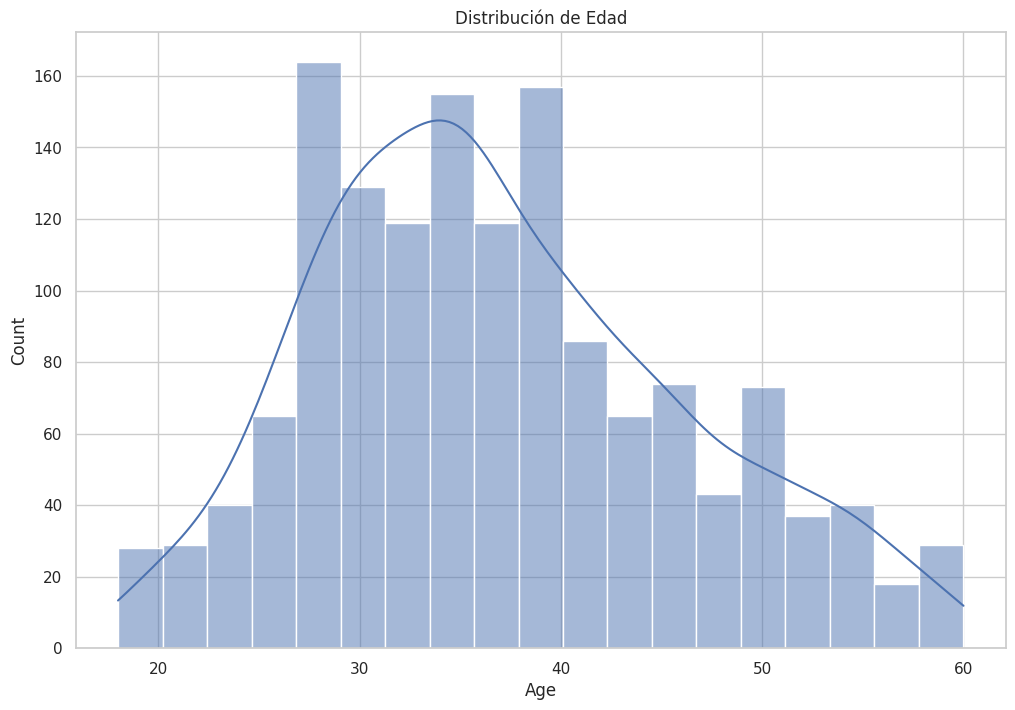

In [55]:
# Estadísticas descriptivas de variables numéricas
df.describe()
# Visualización de la distribución de las edades
sns.histplot(df['Age'], kde=True)
plt.title("Distribución de Edad")
plt.show()

+ Aquí nos muestra la edad promedio de los empleados que es de al rededor de un 36.9 años.

+ Los sueldos igual varian ampliamente, desde 1000, pero pueden llegar hasta mas de 19000.

+ Permiten entender la experiencia y permanencia de los empleados.



# Identificación de variables categóricas y numéricas

In [36]:
# Variables categóricas: columnas con tipo de datos "object" o "category"
# Definir las columnas categóricas
categorias = df.select_dtypes(include=['object', 'category']).columns.tolist()


# Variables numéricas: columnas con tipo de datos numéricos (int64, float64)
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Mostrar resultados
print("Variables categóricas:")
print(categorical_cols)

print("\nVariables numéricas:")
print(numerical_cols)


Variables categóricas:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Variables numéricas:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


En este bloque se clasifican las columnas del dataset según su tipo de dato:

+ Variables categoricas: Son aquellas que representan categorias y grupos (por ejemplo: Genero, departamento, estado civil). Estas sulen tener tipo de dato object o category en pandas.

+ Variables numéricas: contienen valores cuantitativos y permiten operaciones matemáticas (por ejemplo: edad, ingresos, años en la empresa). Estas son de tipo int64 O float64.

________________________________________________________________________________


+ Las variables categoricas se analizaran a traves de frecuencias o graficos de barras.

+ Las variables numericas se analizaran a traves de estadisticas descriptivas, histogramas, bloxplots, etc.

# Tendencia Central y de Dispersión

In [37]:
# Calcular las estadísticas descriptivas de 'Age' usando un solo bloque
age_stats = {
    'Media': df['Age'].mean(),
    'Mediana': df['Age'].median(),
    'Moda': df['Age'].mode()[0],
    'Desviación estándar': df['Age'].std(),
    'Varianza': df['Age'].var(),
    'Cuartiles': df['Age'].quantile([0.25, 0.5, 0.75])
}

# Imprimir los resultados
for stat, value in age_stats.items():
    print(f"{stat}: {value}")


Media: 36.923809523809524
Mediana: 36.0
Moda: 35
Desviación estándar: 9.135373489136734
Varianza: 83.45504878602227
Cuartiles: 0.25    30.0
0.50    36.0
0.75    43.0
Name: Age, dtype: float64


Este código calcula y muestra las estadistica descriptivas de la columna 'Age' (edad) del dataset, que incluyen:

1. Media: Promedio de las edades.
2. Mediana: Valor central de las edades cuando estan ordenadas.
3. Moda: La edad que mas se repite.
4. Desviación estándar: Que tanto varian las edades respecto a la media.
5. Varianza: La medida de dispersión de las edades (cuanto se alejan de la media).
6. Cuartiles: Los valores que dividen las edades en cuatro partes, mostrando la distribución de los datos.

El codigo organiza estos calculos en un diccionario y luego imprime los resultado de manera clara. Esto ayuda a entender la distribucion y variabilidad de la edad entre los empleados.

# Histograma De Variables Númericas

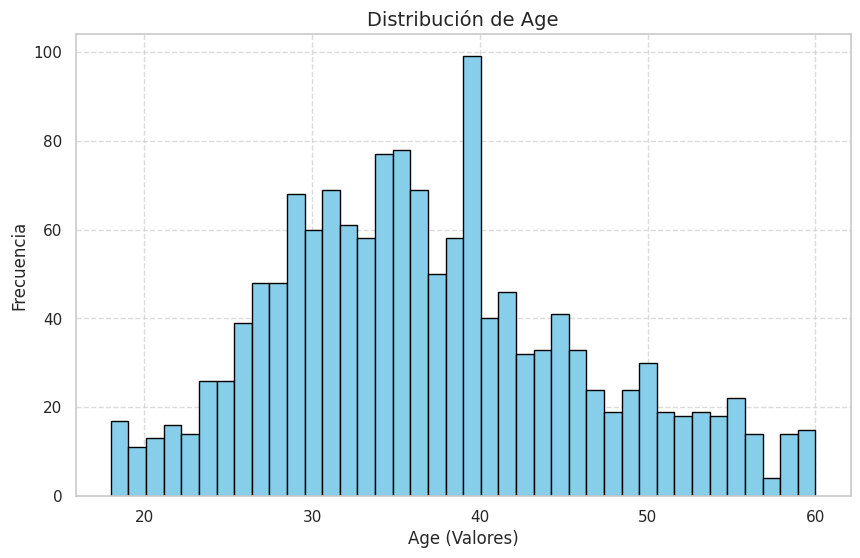

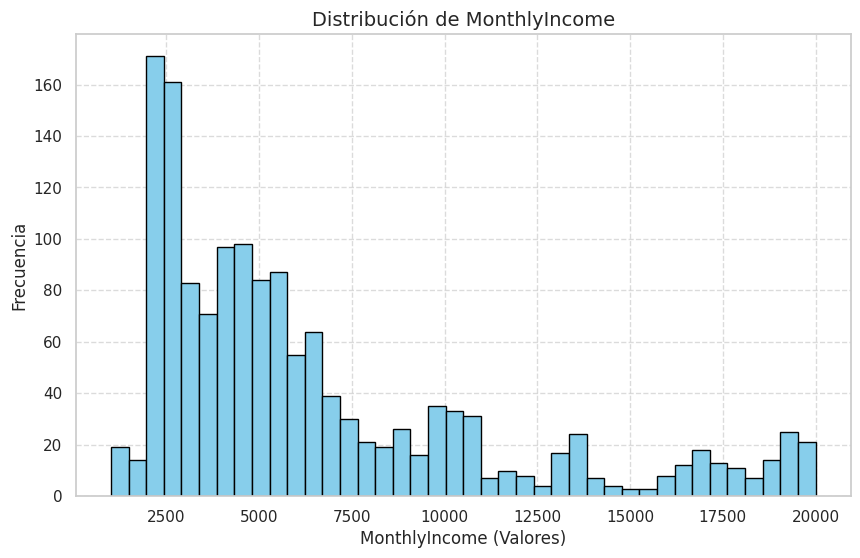

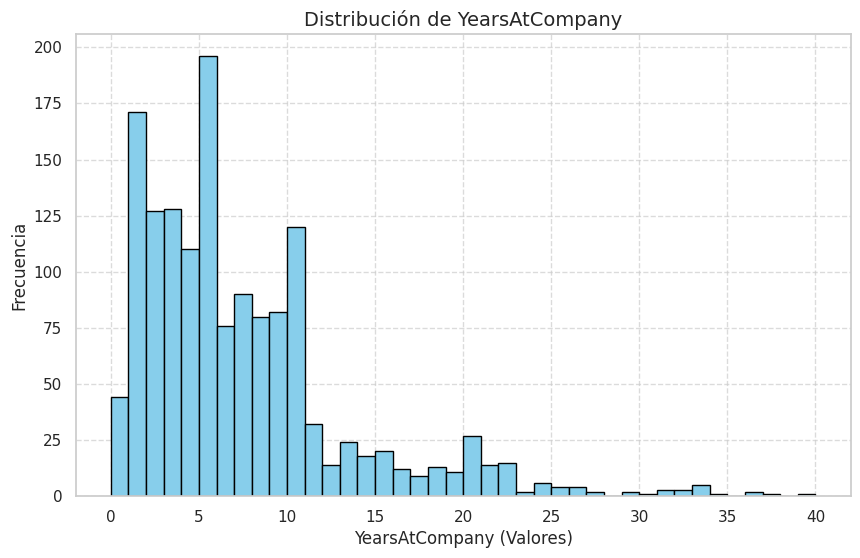

In [38]:
import matplotlib.pyplot as plt

# Definir función para graficar histogramas
def plot_histograma(variable, bins=30):
    plt.figure(figsize=(10, 6))
    plt.hist(df[variable], bins=bins, color='skyblue', edgecolor='black')
    plt.xlabel(f'{variable} (Valores)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.title(f'Distribución de {variable}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Definir las variables numéricas para analizar
variables_numericas = ["Age", "MonthlyIncome", "YearsAtCompany"]

# Iterar sobre las variables y graficar su distribución
for var in variables_numericas:
    plot_histograma(var, bins=40)  # Número de bins ajustado a 40 para un análisis más detallado


Este código define una funcion llamada plot_hist, que crea y muestra un histograma para la variable númerica especifica del dataset. La funcion realiza lo siguiente:

1. Tamaño de la figura: Establece el tamaño de la figura para que sea adecuada para la visualizacion.
2. Histograma: Utiliza plt.hist() para crear el histograma de la variable, con un numero de 50 barras(bins) para representar las frecuencias de los datos.
3. Etiquetas: Define las etiquetas del eje X (nom variable) y del eje Y (frecuencia de los valores).
4. Titulo: Asigna un titulo al grafico que describe la variable.
5. Mostrar el grafico: Utiliza plt.show() para visualizar el histograma generado.

El bloque de codigo posterior recorre las variables numericas "Age" "MonthlyIncome" y "YearsAtCompany" y llama la funcion plot_hits para generar un histograma para cada una de ellas. Esto permite analizar visualmente la distribucion de cda variable en el conjunto de datos.

# BOXPLOTS

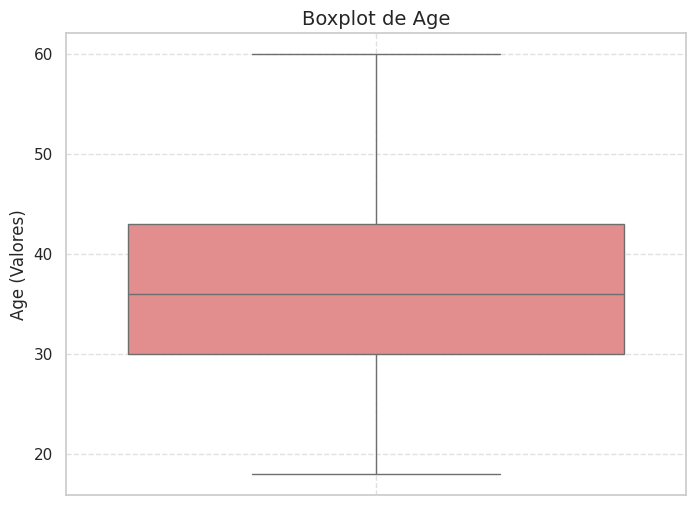

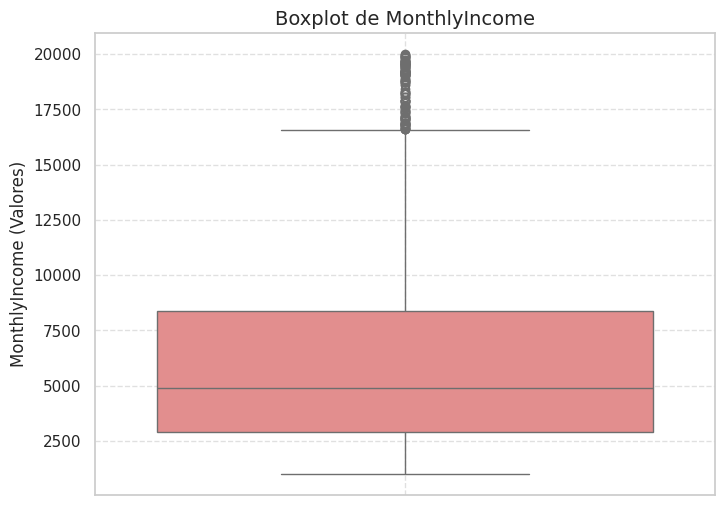

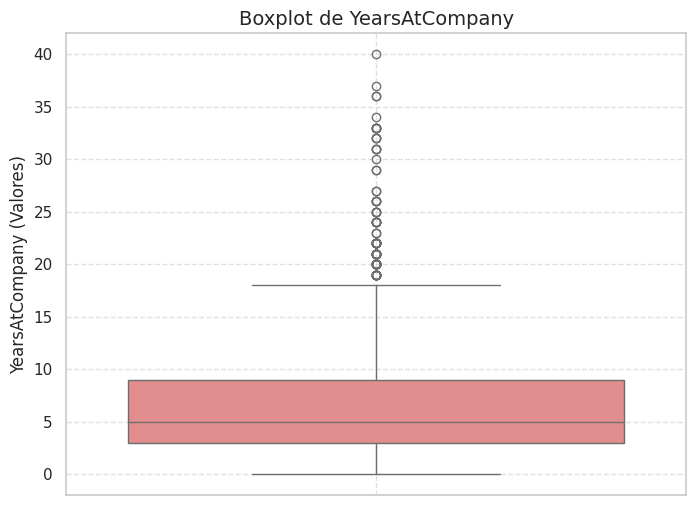

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la lista de variables numéricas
variables_numericas = ["Age", "MonthlyIncome", "YearsAtCompany"]

# Iterar sobre cada variable y crear un boxplot
for var in variables_numericas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[var], color='lightcoral')
    plt.title(f'Boxplot de {var}', fontsize=14)
    plt.xlabel('')
    plt.ylabel(f'{var} (Valores)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


Esto nos ayuda a entender mejor la distribución y dispersión de las variables numericas clave, como la edad, el ingreso mensual y los años de trabajo en la empresa. El boxplot facilita la identificacion de valores atipicos, lo que podria sugerir situaciones inusuales o errores en los datos.


¿Que se esta haciendo? Se generan boxplots para las variables numericas selecionadas (age, monthlyIncome, YearsAtCompany).


# Variables Categóricas

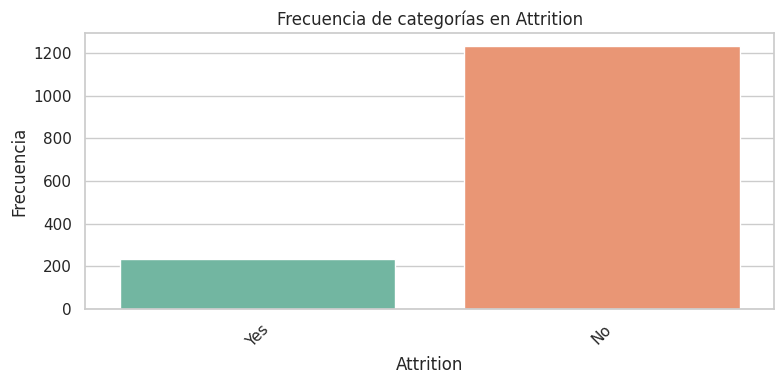

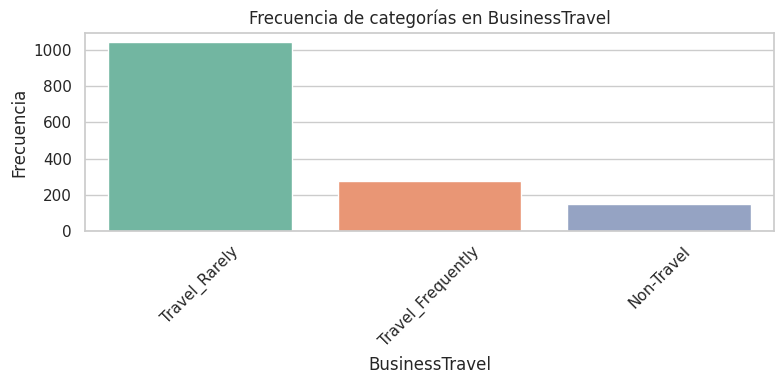

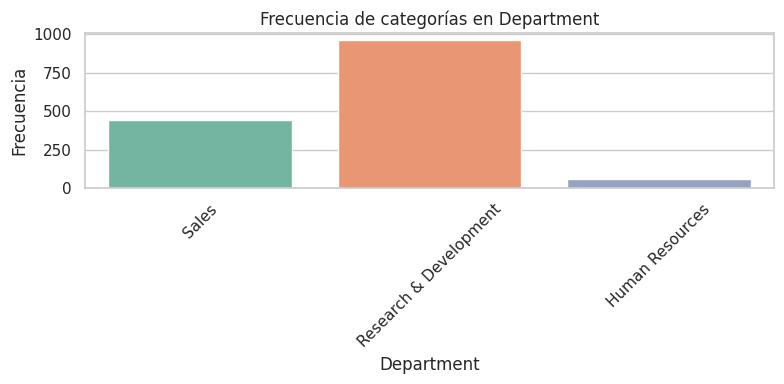

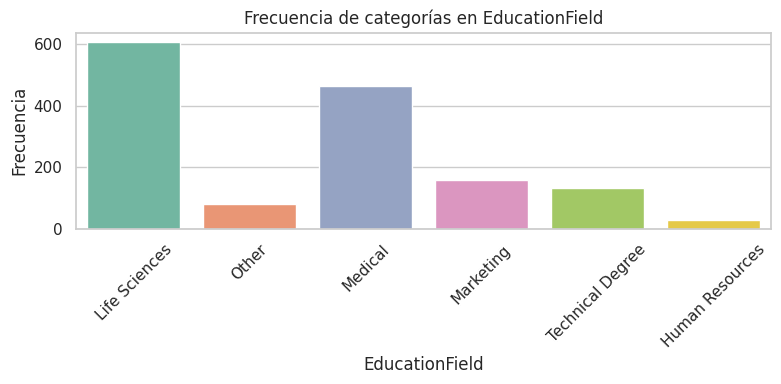

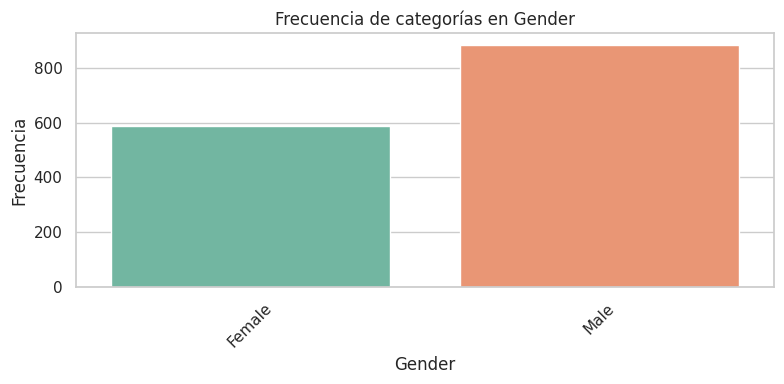

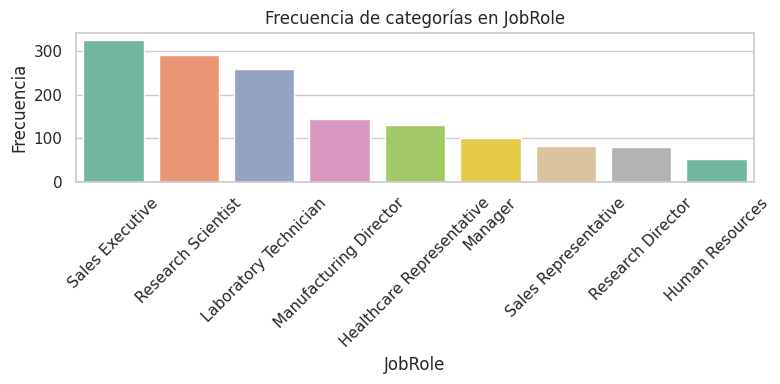

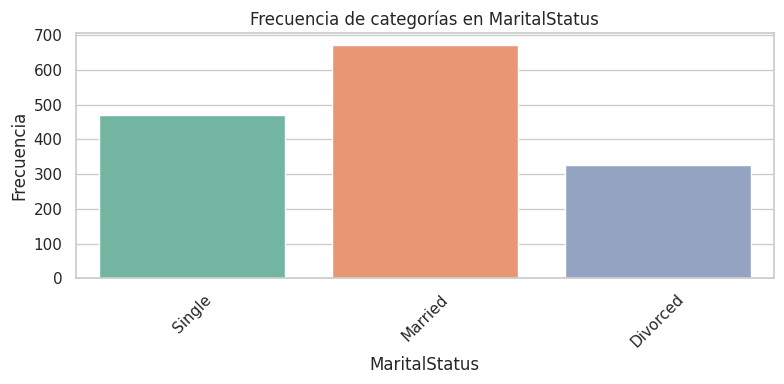

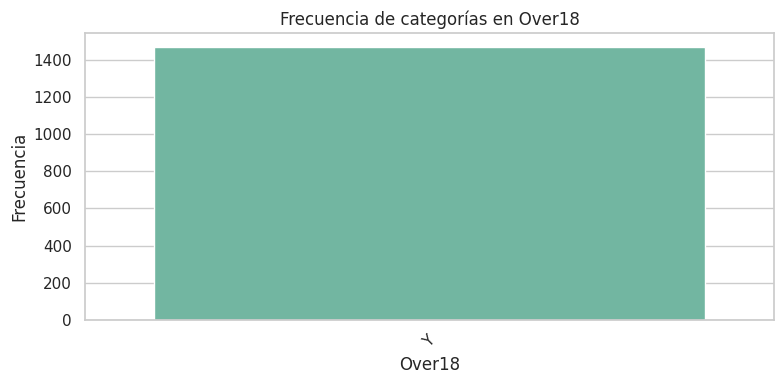

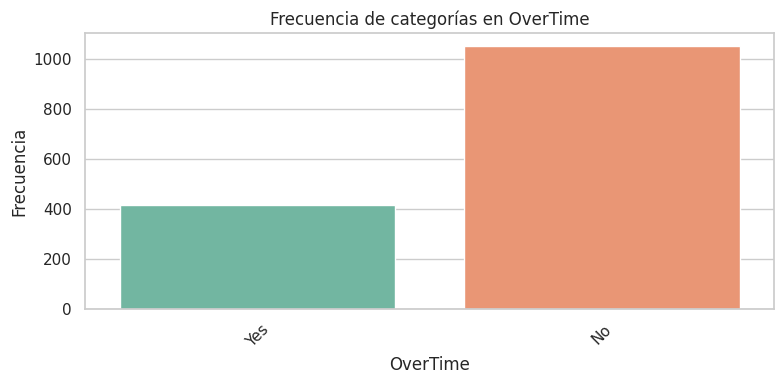

In [43]:
# Visualización de la distribución de variables categóricas
# Este bloque genera gráficos de barras (countplots) para cada columna categórica del dataset,
# permitiendo observar cuántas veces aparece cada categoría dentro de las variables analizadas.

for variable in categorias:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=variable, data=df, hue=variable, palette="Set2", legend=False)  # Se agrega 'hue' para evitar la advertencia
    plt.title(f'Frecuencia de categorías en {variable}')
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Aqui se estan generando graficos de barras (countplots) para visualizar mas que nada la frecuencia de aparicion de cada categoria en las columnas categoricas del dataset.

Estos graficos proporcionan una vision rapida de las categorias en cada variable y ayudan a comprender mejor la distribucion de los datos antes de realizar un analisis mas profundo o construir modelos.




# Rotación del personal

<ipython-input-45-1a638f4c6968>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.catplot(x="JobLevel", y="Attrition_binary", kind="bar", data=df, height=6, palette="coolwarm")


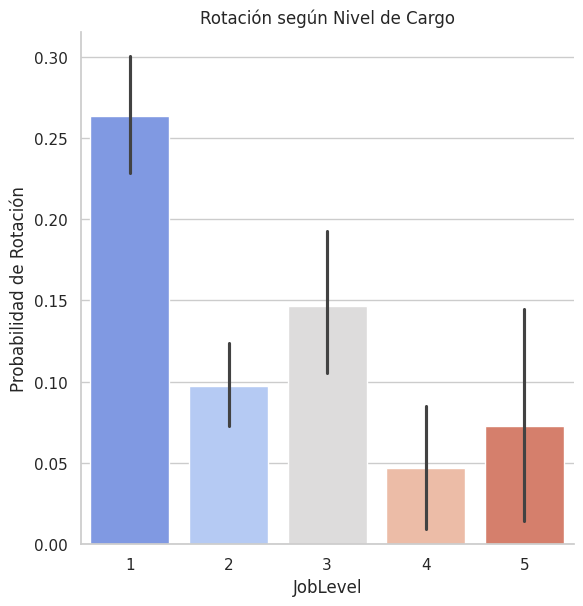

In [45]:
# Crear columna binaria para 'Attrition'
df['Attrition_binary'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Gráfico de barras por JobLevel con color personalizado
grafico = sns.catplot(x="JobLevel", y="Attrition_binary", kind="bar", data=df, height=6, palette="coolwarm")
grafico.set_ylabels("Probabilidad de Rotación")
plt.title("Rotación según Nivel de Cargo")
plt.show()



En este codigo, se lleva a cabo un proceso de transformacion y visualizacion relacionado con la rotacion de empleados. Se creo un grafico de barras que muestra la probabilidad de rotacion de empleados segun el nivel de cargo (Joblevel). Use sns.catplot() para poder graficar como la rotacion varia con cada nivel de cargo. La probabilidad de rotacion esta representada en el eje y y el nivel de cargo en el eje x.

# Registro por rol

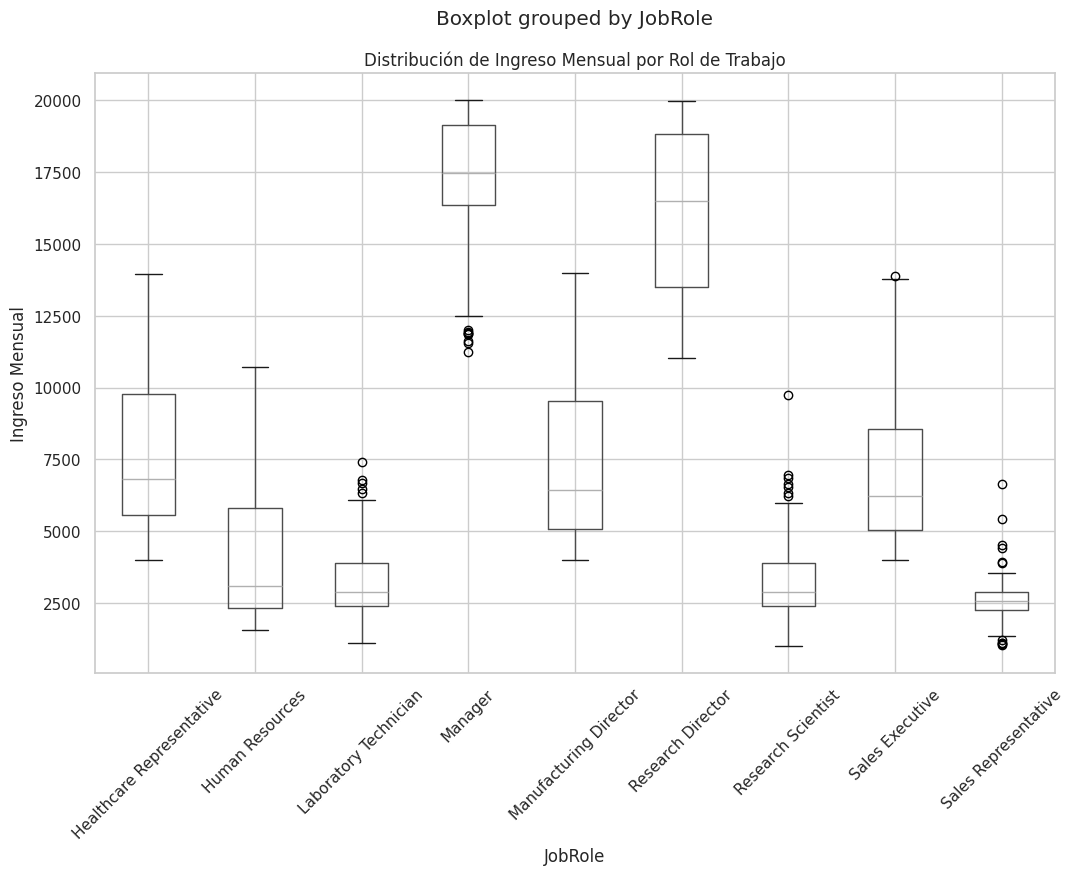

In [46]:
# Crear boxplot para comparar el ingreso mensual por rol de trabajo
df.boxplot(column="MonthlyIncome", by="JobRole")
plt.title("Distribución de Ingreso Mensual por Rol de Trabajo")
plt.xticks(rotation=45)
plt.ylabel("Ingreso Mensual")
plt.show()


Este bloque crea un boxplot para comparar la distribucion de los ingresos mensuales (MonthlyIcome) entre diferentes roles de trabajo (JobRole). El boxplot permite visualizar la mediana, cuartiles, valores atipicos y la dispersion de los ingresos dentro de cada rol de trabajo, lo que ayuda a identificar las variaciones salariales entre los diferentes roles en la empresa.

# La relación entre las variables númericas

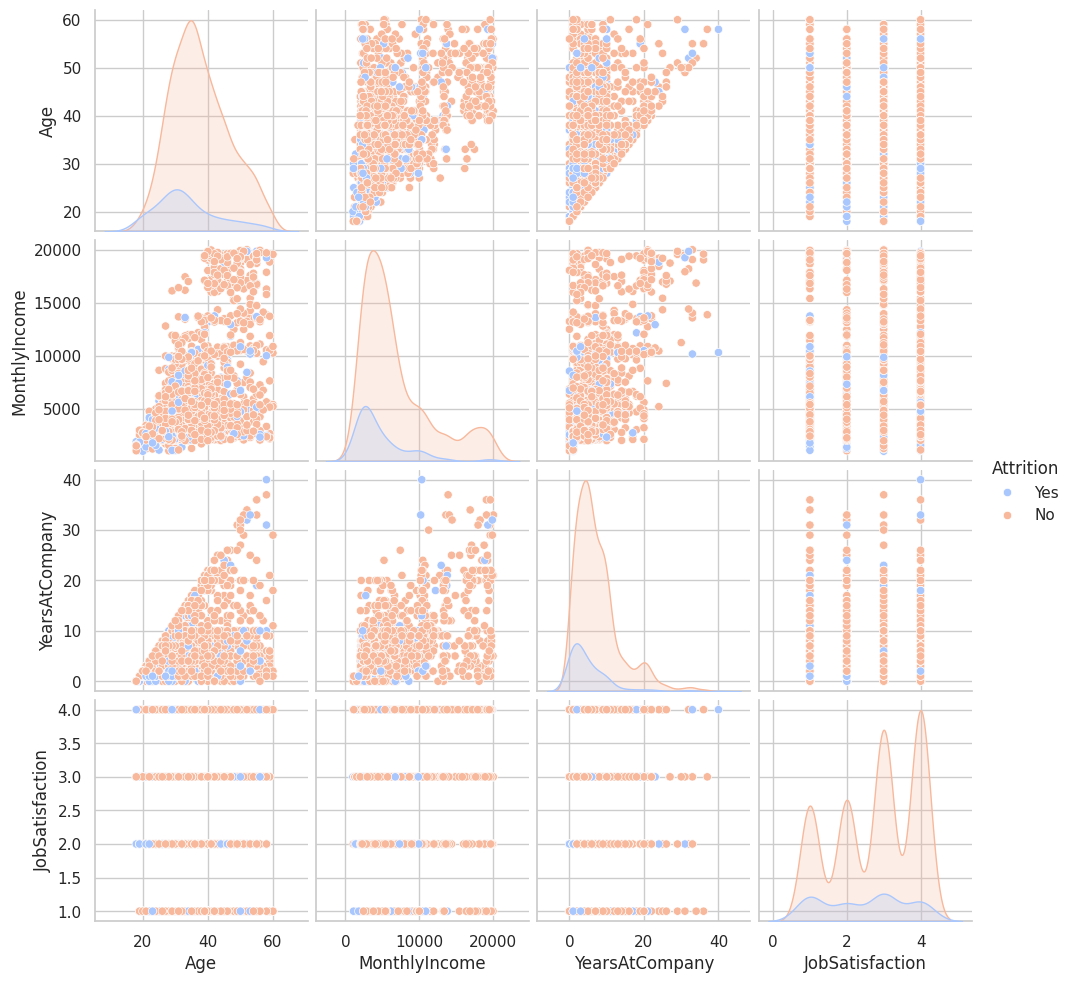

In [49]:
sns.pairplot(df[["Age", "MonthlyIncome", "YearsAtCompany", "JobSatisfaction", "Attrition"]], hue="Attrition", palette="coolwarm")
plt.show()


Este bloque crea un pairplot para observar las relaciones entre variables como la edad, ingreso mensual, años en la empresa, satisfaccion laboral y rotacion. EL parametro hue="Attrition" colorea los puntos segun si el empleado ha rotado, facilitando la identificacion de patrones y diferencias entre empleados que han dejado la empresa y los que no.

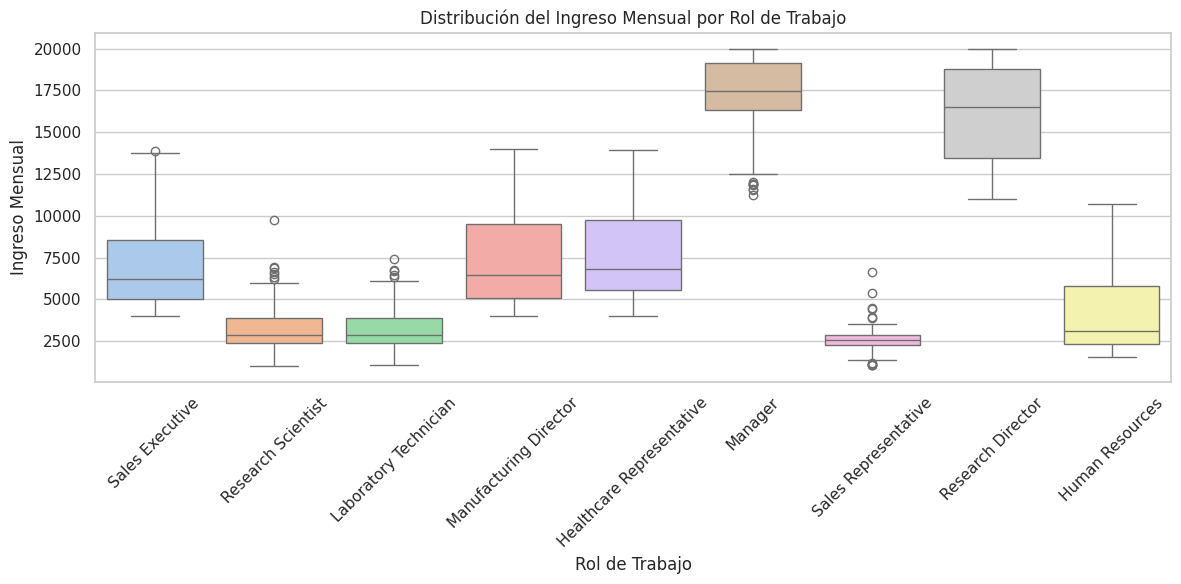


📊 Interpretación del Gráfico Boxplot:
• Cada caja representa la distribución del ingreso mensual por tipo de rol en la empresa.
• La línea dentro de la caja es la mediana (ingreso medio del grupo).
• Los extremos de la caja indican el rango intercuartílico (50% central de los datos).
• Los puntos fuera de los bigotes son valores atípicos (sueldos muy altos o bajos).
• Comparar las alturas de las cajas permite ver qué roles ganan más o tienen más variabilidad.


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='JobRole', y='MonthlyIncome', hue='JobRole', palette='pastel', legend=False)
plt.xticks(rotation=45)
plt.title('Distribución del Ingreso Mensual por Rol de Trabajo')
plt.xlabel('Rol de Trabajo')
plt.ylabel('Ingreso Mensual')
plt.tight_layout()
plt.show()

# Explicación del gráfico
print("\n📊 Interpretación del Gráfico Boxplot:")
print("• Cada caja representa la distribución del ingreso mensual por tipo de rol en la empresa.")
print("• La línea dentro de la caja es la mediana (ingreso medio del grupo).")
print("• Los extremos de la caja indican el rango intercuartílico (50% central de los datos).")
print("• Los puntos fuera de los bigotes son valores atípicos (sueldos muy altos o bajos).")
print("• Comparar las alturas de las cajas permite ver qué roles ganan más o tienen más variabilidad.")



# Conclusión:
El analisis muestra que la rotacion de empleados esta influenciada por factores como el nivel de cargo, los años en la empresa, el salario y la satisfaccion laboral. Los empleados mas jovenes, con menores ingresos y menos tiempo en la empresa, tienen mayor probabilidad de rotacion. Las visualizaciones, como graficos de barras y boxplots, ayudan a identificar estos patrones, lo que puede guiar el diseño de estrategias de retencion centradas en los empleados de mayor riesgo.